In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch import optim
from torch.autograd import Variable
#for dataset
from torchvision import datasets
#For visualization
import matplotlib.pyplot as plt
import numpy as np
from random import randint

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=8,kernel_size=5,stride=1,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(nn.Conv2d(8, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output
class N_CNN(nn.Module):
    def __init__(self):
        super(N_CNN, self).__init__()
        self.conv1 = nn.Sequential(
            #out_channels=16, 8
            nn.Conv2d(in_channels=1,out_channels=8,kernel_size=5,stride=1,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(nn.Conv2d(8, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 14 * 14, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output

In [ ]:
# Parameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 200
learning_rate = .01
num_epochs = 10
model = CNN()
loss_func = nn.CrossEntropyLoss()
Adam_optimizer = optim.Adam(model.parameters(), lr = learning_rate)
SGD_optimizer = optim.SGD(model.parameters(), lr = learning_rate)



In [ ]:
#normalization
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

#Load Data:
train_data = datasets.MNIST(root = 'data', train = True, transform = transforms.ToTensor(),download = True)
test_data = datasets.MNIST(root = 'data', train = False,transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,shuffle=True,num_workers=1)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size,shuffle=True,num_workers=1)

In [ ]:
print(train_data.data.size())
# print(train_data.data.size())
# print(train_data.data[0])
# plt.imshow(train_data.data[0], cmap='gray')
# plt.title('%i' % train_data.targets[0])
# plt.show()


torch.Size([60000, 28, 28])


In [ ]:
def train(num_epochs, cnn, train_loader, optimizer, loss_function):
    cnn.train()
    # Train the model
    total_step = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            #print(images.shape, labels.shape)
            images_grad = Variable(images)
            labels_grad = Variable(labels)
            output = cnn(images_grad)
            loss = loss_func(output, labels_grad)

            # clear gradients for this training step
            optimizer.zero_grad()
            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()

            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

#train(num_epochs, model, train_loader,SGD_optimizer,loss_func )

In [ ]:
train(num_epochs, model, train_loader,SGD_optimizer,loss_func )

KeyboardInterrupt: ignored

In [ ]:
def test(model,test_loader,batch_size):
    # Test the model
    model.eval()
    count=0
    with torch.no_grad():
        correct = 0
        total = 0
        accuracies = []
        for images, labels in test_loader:
            output = model(images)
            pred_num = torch.max(output, 1)[1].data.squeeze()
            accuracy = (pred_num == labels).sum().item() / float(labels.size(0))
            accuracies.append(accuracy)
            count+=1
        print('Test Accuracy of the model on the 10000 test images: %.2f' % np.mean(accuracies))
        print(count)
#test(model,test_loader,batch_size)


In [ ]:
'''Base Example'''
# image_tensor = torch.empty(train_data.data.shape[0],1,56, 56)
# print(image_tensor.shape)
# for i in range(train_data.data.shape[0]):
#   zeros = torch.zeros((56,56))
#   rand_x = randint(0, 28)
#   rand_y = randint(0, 28)
#   for x in range(28):
#     for y in range(28):
#       zeros[x + rand_x][y + rand_y] = train_data.data[0][x][y]
#   #print(zeros.shape)
#   image_tensor[i] = zeros
#   #image_tensor = torch.cat((image_tensor, zeros), dim=0)
#   #print(image_tensor.shape)

# new_loader = torch.utils.data.DataLoader(image_tensor,batch_size=batch_size,shuffle=True,num_workers=1)
'''test'''
# print(torch.squeeze(image_tensor.data))
# plt.imshow(torch.squeeze(image_tensor.data)[0], cmap='gray')


60000
torch.Size([60000, 1, 56, 56])


In [ ]:
class NDataset(torch.utils.data.Dataset):
    def __init__(self, images, labels):
        self.data = images
        self.targets = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        image = self.data[index]
        target = self.targets[index]

        return image, target

def new_data_Loaders(train_data,test_data):
  exp2_train_images = torch.empty(train_data.data.shape[0],1,56, 56)
  exp3_train_images = torch.empty(train_data.data.shape[0],1,56, 56)
  exp2_test_images = torch.empty(test_data.data.shape[0],1,56, 56)
  exp3_test_images = torch.empty(test_data.data.shape[0],1,56, 56)
  print(exp2_train_images.shape)
  #exp3_images = torch.empty(train_data.data.shape[0],1,56, 56)
  for i in range(train_data.data.shape[0]):
    exp2_zeros = torch.zeros((56,56))
    exp3_zeros = torch.zeros((56,56))

    exp2_rand_x = randint(0, 28)
    exp2_rand_y = randint(0, 28)
    exp3_rand_x = 0
    exp3_rand_y = randint(0, 28)

    for x in range(28):
      for y in range(28):
        exp2_zeros[x + exp2_rand_x][y + exp2_rand_y] = train_data.data[i][x][y]
        exp3_zeros[x + exp3_rand_x][y + exp3_rand_y] = train_data.data[i][x][y]
    exp2_train_images[i] = exp2_zeros
    exp3_train_images[i] = exp3_zeros
    # if i ==20:
    #   break

  exp2_train = NDataset(exp2_train_images.data, train_data.targets)
  exp2_train_loader = torch.utils.data.DataLoader(exp2_train,batch_size=batch_size,shuffle=True,num_workers=1)
  exp3_train = NDataset(exp3_train_images.data, train_data.targets)
  exp3_train_loader = torch.utils.data.DataLoader(exp3_train,batch_size=batch_size,shuffle=True,num_workers=1)


  for i in range(test_data.data.shape[0]):
    exp2_zeros = torch.zeros((56,56))
    exp3_zeros = torch.zeros((56,56))

    exp2_rand_x = randint(0, 28)
    exp2_rand_y = randint(0, 28)
    exp3_rand_x = 28
    exp3_rand_y = randint(0, 28)

    for x in range(28):
      for y in range(28):
        exp2_zeros[x + exp2_rand_x][y + exp2_rand_y] = test_data.data[i][x][y]
        exp3_zeros[x + exp3_rand_x][y + exp3_rand_y] = test_data.data[i][x][y]
    exp2_test_images[i] = exp2_zeros
    exp3_test_images[i] = exp3_zeros
    # if i ==20:
    #   break
  exp2_test= NDataset(exp2_test_images.data, test_data.targets)
  exp2_test_loader = torch.utils.data.DataLoader(exp2_test,batch_size=batch_size,shuffle=True,num_workers=1)
  exp3_test = NDataset(exp3_test_images.data, test_data.targets)
  exp3_test_loader = torch.utils.data.DataLoader(exp3_test,batch_size=batch_size,shuffle=True,num_workers=1)
  return exp2_train_loader, exp3_train_loader, exp2_test_loader,exp3_test_loader




exp2_train_loader,exp3_train_loader,exp2_test_loader,exp3_test_loader = new_data_Loaders(train_data, test_data)
for i, (images, labels) in enumerate(exp2_train_loader):
            print(images.shape, labels.shape)

torch.Size([60000, 1, 56, 56])
torch.Size([200, 1, 56, 56]) torch.Size([200])
torch.Size([200, 1, 56, 56]) torch.Size([200])
torch.Size([200, 1, 56, 56]) torch.Size([200])
torch.Size([200, 1, 56, 56]) torch.Size([200])
torch.Size([200, 1, 56, 56]) torch.Size([200])
torch.Size([200, 1, 56, 56]) torch.Size([200])
torch.Size([200, 1, 56, 56]) torch.Size([200])
torch.Size([200, 1, 56, 56]) torch.Size([200])
torch.Size([200, 1, 56, 56]) torch.Size([200])
torch.Size([200, 1, 56, 56]) torch.Size([200])
torch.Size([200, 1, 56, 56]) torch.Size([200])
torch.Size([200, 1, 56, 56]) torch.Size([200])
torch.Size([200, 1, 56, 56]) torch.Size([200])
torch.Size([200, 1, 56, 56]) torch.Size([200])
torch.Size([200, 1, 56, 56]) torch.Size([200])
torch.Size([200, 1, 56, 56]) torch.Size([200])
torch.Size([200, 1, 56, 56]) torch.Size([200])
torch.Size([200, 1, 56, 56]) torch.Size([200])
torch.Size([200, 1, 56, 56]) torch.Size([200])
torch.Size([200, 1, 56, 56]) torch.Size([200])
torch.Size([200, 1, 56, 56]) 

In [ ]:
# Parameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 200
learning_rate = .01
num_epochs = 10
loss_func = nn.CrossEntropyLoss()



model_2 = N_CNN()
model_3 = N_CNN()
Adam_optimizer_2 = optim.Adam(model_2.parameters(), lr = learning_rate)
SGD_optimizer_2 = optim.SGD(model_2.parameters(), lr = learning_rate)
Adam_optimizer_3 = optim.Adam(model_3.parameters(), lr = learning_rate)
SGD_optimizer_3 = optim.SGD(model_3.parameters(), lr = learning_rate)

train(num_epochs, model_2, exp2_train_loader,SGD_optimizer_2,loss_func)
train(num_epochs, model_3, exp3_train_loader,SGD_optimizer_3,loss_func)
test(model_2,exp2_test_loader,batch_size)
test(model_3,exp3_test_loader,batch_size)
# flatten the output of conv2 to (batch_size, 32 * 7 * 7)

Epoch [1/10], Step [100/300], Loss: 2.9960
Epoch [1/10], Step [200/300], Loss: 1.2181
Epoch [1/10], Step [300/300], Loss: 0.6756
Epoch [2/10], Step [100/300], Loss: 0.4949
Epoch [2/10], Step [200/300], Loss: 0.3184
Epoch [2/10], Step [300/300], Loss: 0.4144
Epoch [3/10], Step [100/300], Loss: 0.3936
Epoch [3/10], Step [200/300], Loss: 0.3007
Epoch [3/10], Step [300/300], Loss: 0.1685
Epoch [4/10], Step [100/300], Loss: 0.3323
Epoch [4/10], Step [200/300], Loss: 0.2283
Epoch [4/10], Step [300/300], Loss: 0.1780
Epoch [5/10], Step [100/300], Loss: 0.1120
Epoch [5/10], Step [200/300], Loss: 0.1118
Epoch [5/10], Step [300/300], Loss: 0.1269
Epoch [6/10], Step [100/300], Loss: 0.3296
Epoch [6/10], Step [200/300], Loss: 0.1123
Epoch [6/10], Step [300/300], Loss: 0.0797
Epoch [7/10], Step [100/300], Loss: 0.0918
Epoch [7/10], Step [200/300], Loss: 0.1388
Epoch [7/10], Step [300/300], Loss: 0.1328
Epoch [8/10], Step [100/300], Loss: 0.0869
Epoch [8/10], Step [200/300], Loss: 0.1047
Epoch [8/10

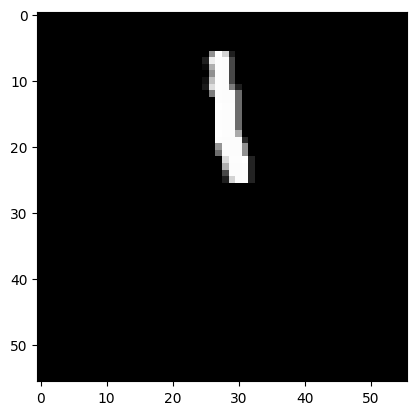

In [ ]:
plt.imshow(torch.squeeze(exp2_images.data)[6], cmap='gray')

In [ ]:
train(num_epochs, model_3, exp3_train_loader,SGD_optimizer_3,loss_func)
test(model_3,exp3_test_loader,batch_size)

Epoch [1/10], Step [100/300], Loss: 2.2743
Epoch [1/10], Step [200/300], Loss: 2.2199
Epoch [1/10], Step [300/300], Loss: 1.0643
Epoch [2/10], Step [100/300], Loss: 0.9754
Epoch [2/10], Step [200/300], Loss: 0.8244
Epoch [2/10], Step [300/300], Loss: 0.5515
Epoch [3/10], Step [100/300], Loss: 0.5171
Epoch [3/10], Step [200/300], Loss: 0.3466
Epoch [3/10], Step [300/300], Loss: 0.2461
Epoch [4/10], Step [100/300], Loss: 0.1696
Epoch [4/10], Step [200/300], Loss: 0.1726
Epoch [4/10], Step [300/300], Loss: 0.1802
Epoch [5/10], Step [100/300], Loss: 0.1294
Epoch [5/10], Step [200/300], Loss: 0.0729
Epoch [5/10], Step [300/300], Loss: 0.2363
Epoch [6/10], Step [100/300], Loss: 0.1470
Epoch [6/10], Step [200/300], Loss: 0.1980
Epoch [6/10], Step [300/300], Loss: 0.1848
Epoch [7/10], Step [100/300], Loss: 0.1233
Epoch [7/10], Step [200/300], Loss: 0.1965
Epoch [7/10], Step [300/300], Loss: 0.1671
Epoch [8/10], Step [100/300], Loss: 0.0663
Epoch [8/10], Step [200/300], Loss: 0.1366
Epoch [8/10